In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
input_data_dir = ""
output_data_dir = ""

In [4]:
# カテゴリ変数をobject型で読み込むための準備
my_dtype = {
    'Customer_ID':float,
    'rev_Mean':float,
    'mou_Mean':float,
    'totmrc_Mean':float,
    'da_Mean':float,
    'ovrmou_Mean':float,
    'vceovr_Mean':float,
    'datovr_Mean':float,
    'roam_Mean':float,
    'change_mou':float,
    'change_rev':float,
    'drop_vce_Mean':float,
    'drop_dat_Mean':float,
    'blck_vce_Mean':float,
    'blck_dat_Mean':float,
    'unan_vce_Mean':float,
    'unan_dat_Mean':float,
    'plcd_vce_Mean':float,
    'plcd_dat_Mean':float,
    'recv_vce_Mean':float,
    'recv_sms_Mean':float,
    'comp_vce_Mean':float,
    'comp_dat_Mean':float,
    'custcare_Mean':float,
    'ccrndmou_Mean':float,
    'cc_mou_Mean':float,
    'inonemin_Mean':float,
    'threeway_Mean':float,
    'mou_cvce_Mean':float,
    'mou_cdat_Mean':float,
    'mou_rvce_Mean':float,
    'owylis_vce_Mean':float,
    'mouowylisv_Mean':float,
    'iwylis_vce_Mean':float,
    'mouiwylisv_Mean':float,
    'peak_vce_Mean':float,
    'peak_dat_Mean':float,
    'mou_peav_Mean':float,
    'mou_pead_Mean':float,
    'opk_vce_Mean':float,
    'opk_dat_Mean':float,
    'mou_opkv_Mean':float,
    'mou_opkd_Mean':float,
    'drop_blk_Mean':float,
    'attempt_Mean':float,
    'complete_Mean':float,
    'callfwdv_Mean':float,
    'callwait_Mean':float,
    'churn':float,
    'months':float,
    'uniqsubs':float,
    'actvsubs':float,
    'new_cell':object,
    'crclscod':object,
    'asl_flag':object,
    'totcalls':float,
    'totmou':float,
    'totrev':float,
    'adjrev':float,
    'adjmou':float,
    'adjqty':float,
    'avgrev':float,
    'avgmou':float,
    'avgqty':float,
    'avg3mou':float,
    'avg3qty':float,
    'avg3rev':float,
    'avg6mou':float,
    'avg6qty':float,
    'avg6rev':float,
    'prizm_social_one':object,
    'area':object,
    'dualband':object,
    'refurb_new':object,
    'hnd_price':float,
    'phones':float,
    'models':float,
    'hnd_webcap':object,
    'truck':float,
    'rv':float,
    'ownrent':object,
    'lor':float,
    'dwlltype':object,
    'marital':object,
    'adults':float,
    'infobase':object,
    'income':float,
    'numbcars':float,
    'HHstatin':object,
    'dwllsize':object,
    'forgntvl':float,
    'ethnic':object,
    'kid0_2':object,
    'kid3_5':object,
    'kid6_10':object,
    'kid11_15':object,
    'kid16_17':object,
    'creditcd':object,
    'eqpdays':float,
}
categorical_features = [
               'new_cell',
               'crclscod',
               'asl_flag',
               'area',
               'dualband',
               'refurb_new',
               'hnd_webcap',
               'ownrent',
               'dwlltype',
               'marital',
               'infobase',
               'HHstatin',
               'dwllsize',
               'ethnic',
               'kid0_2',
               'kid3_5',
               'kid6_10',
               'kid11_15',
               'kid16_17',
               'creditcd',
               'prizm_social_one'
]
drop_features = [
    'months',
    'Customer_ID',
    'rev_Mean',
    'mou_Mean',
    'da_Mean',
    'ovrmou_Mean',
    'vceovr_Mean',
    'datovr_Mean',
    'roam_Mean',
    'change_mou',
    'change_rev',
    'drop_vce_Mean',
    'drop_dat_Mean',
    'blck_vce_Mean',
    'blck_dat_Mean',
    'unan_vce_Mean',
    'unan_dat_Mean',
    'plcd_vce_Mean',
    'plcd_dat_Mean',
    'recv_vce_Mean',
    'recv_sms_Mean',
    'comp_vce_Mean',
    'comp_dat_Mean',
    'custcare_Mean',
    'ccrndmou_Mean',
    'cc_mou_Mean',
    'inonemin_Mean',
    'threeway_Mean',
    'mou_cvce_Mean',
    'mou_cdat_Mean',
    'mou_rvce_Mean',
    'owylis_vce_Mean',
    'mouowylisv_Mean',
    'iwylis_vce_Mean',
    'mouiwylisv_Mean',
    'peak_vce_Mean',
    'peak_dat_Mean',
    'mou_peav_Mean',
    'mou_pead_Mean',
    'opk_vce_Mean',
    'opk_dat_Mean',
    'mou_opkv_Mean',
    'mou_opkd_Mean',
    'drop_blk_Mean',
    'attempt_Mean',
    'complete_Mean',
    'callfwdv_Mean',
    'callwait_Mean',
    'churn',
    'actvsubs',
    'new_cell',
    'totcalls',
    'adjmou',
    'avgqty',
    'avg3mou',
    'avg3qty',
    'avg3rev',
    'avg6mou',
    'avg6qty',
    'prizm_social_one',
    'dualband',
    'hnd_price',
    'hnd_webcap',
    'truck',
    'rv',
    'ownrent',
    'lor',
    'dwlltype',
    'marital',
    'adults',
    'infobase',
    'income',
    'numbcars',
    'HHstatin',
    'dwllsize',
    'forgntvl',
    'ethnic',
    'kid0_2',
    'kid3_5',
    'kid6_10',
    'kid11_15',
    'kid16_17',
    'creditcd'
]
target_label = ['months']
train_file_name = input_data_dir + 'Telecom_customer churn.csv'

In [5]:
import pandas as pd
def input_train_file(filename, my_dtype):

    df = pd.read_csv(train_file_name, header=0, dtype=my_dtype)
    for column in target_label:
        y = df[column]
    X = df.drop(target_label, axis=1)
    X = X.reset_index(drop=True)
    print('missing value all count:input_train_file', X.isnull().sum().sum())
    return df, X, y

In [6]:
df, X, y = input_train_file(train_file_name, my_dtype)

missing value all count:input_train_file 342969


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

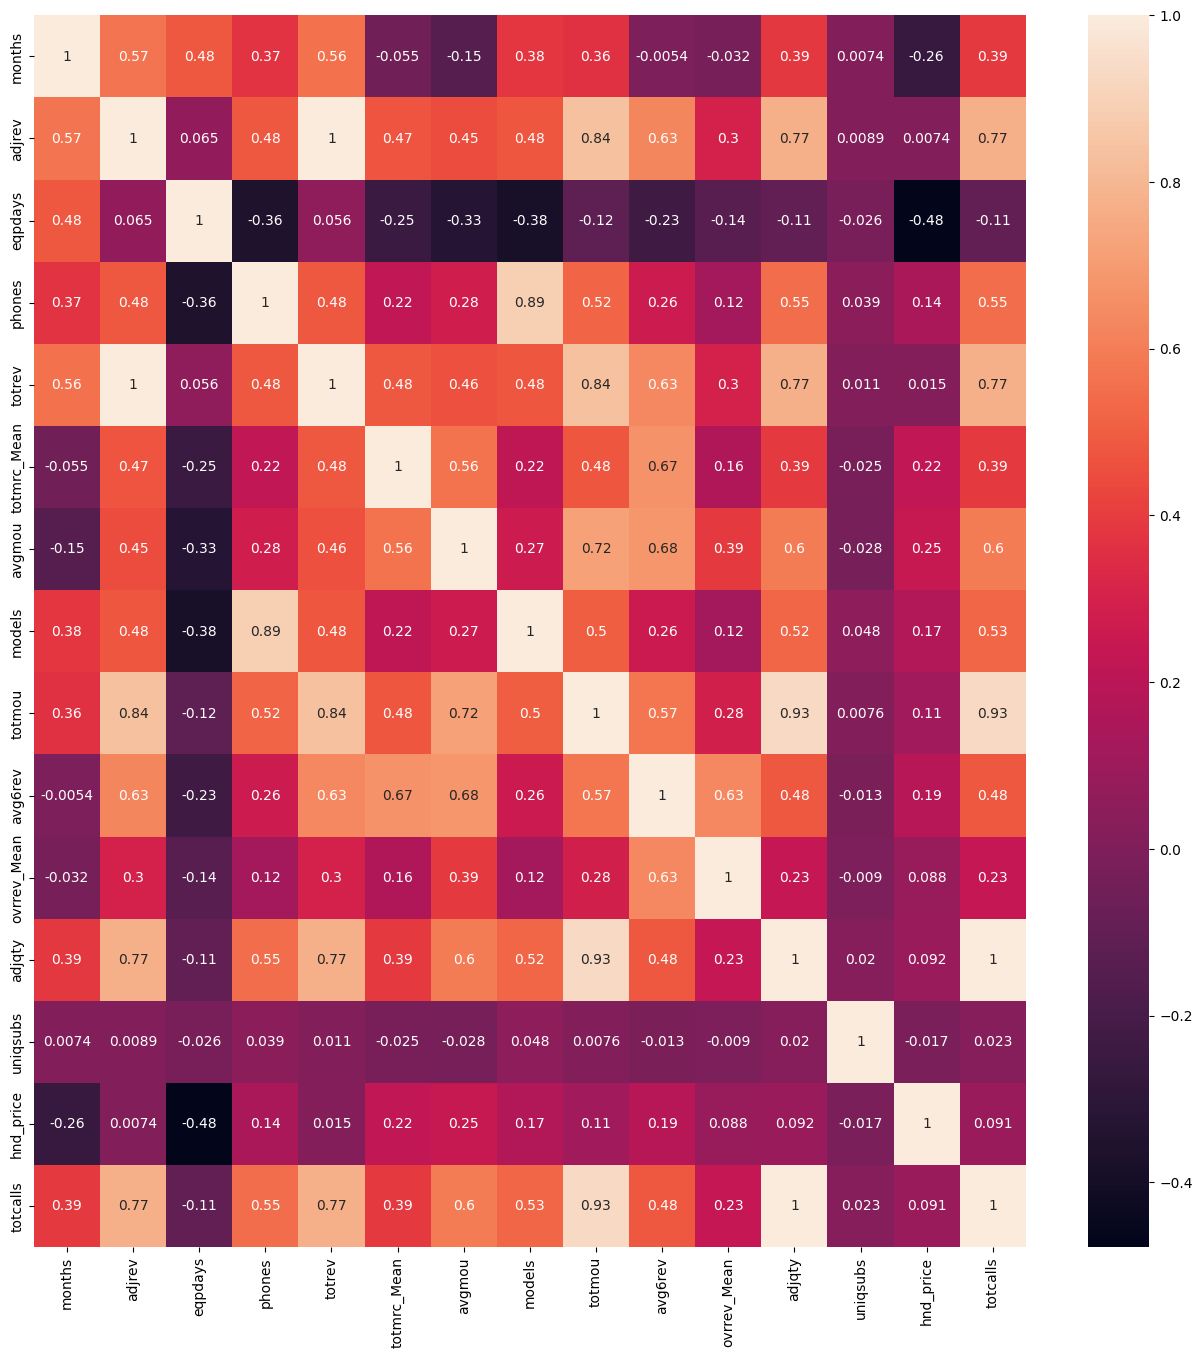

In [8]:
plt.figure(figsize=(16, 16))
sns.heatmap(df[['months', 'adjrev', 'eqpdays', 'phones', 'totrev', 'totmrc_Mean', 'avgmou',  'models',  'totmou',  'avg6rev', 'ovrrev_Mean', 'adjqty', 'uniqsubs', 'hnd_price', 'totcalls']].corr(), annot=True)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [10]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns
    5. For each numeric variable, fill the column with the mean value.
    6. Create dummy columns for all the categorical variables, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['months'], axis=0)
    y = df['months']

    #Drop respondent and expected salary columns
    df = df.drop(['months', 'Customer_ID'], axis=1)

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    X = df
    return X, y

In [11]:
X, y = clean_data(df)

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
model = lgb.LGBMRegressor(random_state=123).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14797
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 194
[LightGBM] [Info] Start training from score 18.806257


In [15]:
y_test_preds = model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

In [16]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.  

0.9492837702795786
4.751537883805415


In [17]:
!pip install shap

In [18]:
import shap

In [19]:
df_x_train = pd.DataFrame(X, columns=X.columns)
explainer = shap.Explainer(model.predict, X)

In [20]:
shap_values = explainer(df_x_train)

Permutation explainer: 100001it [1:39:41, 16.68it/s]                            


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


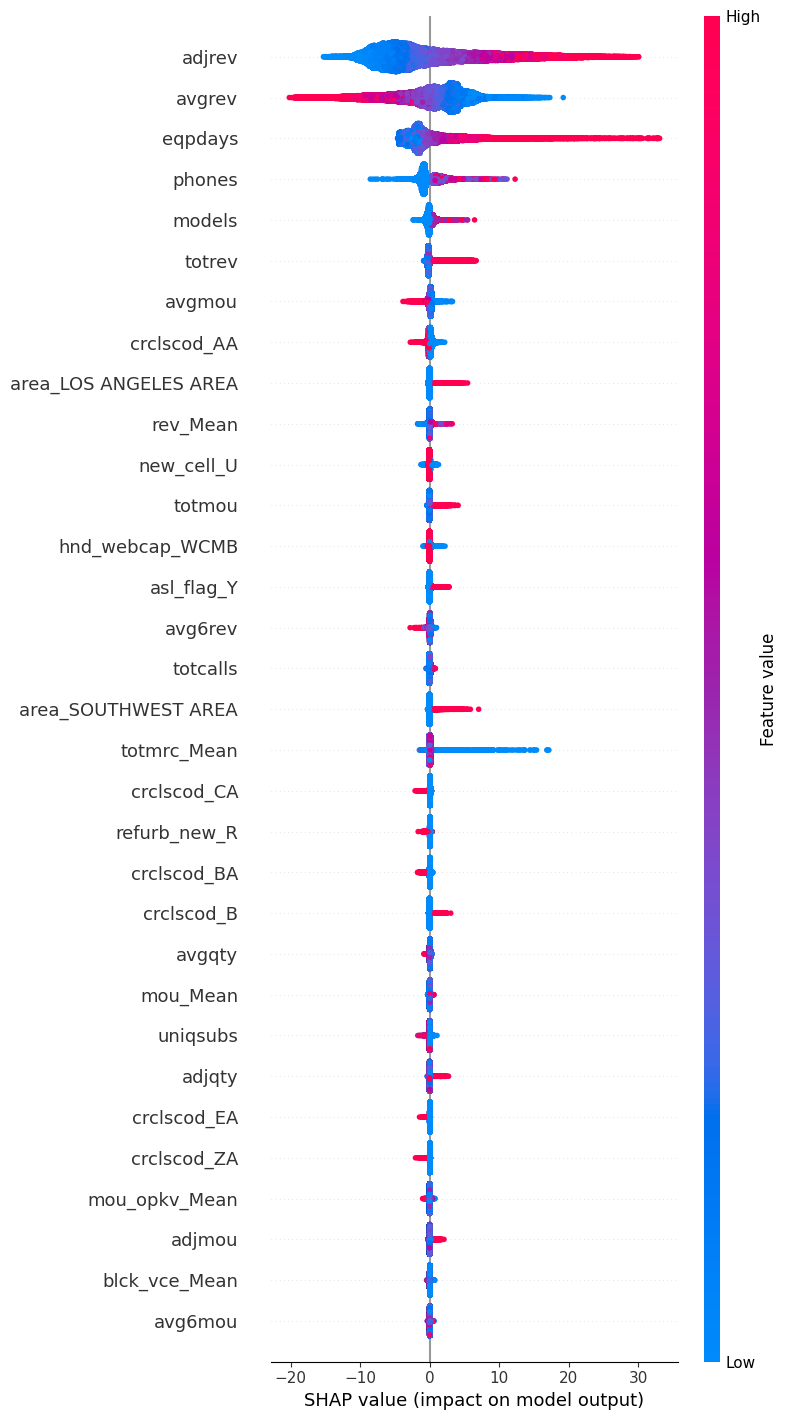

In [21]:
shap.summary_plot(
    shap_values = shap_values,
    features = X,
    max_display=32
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


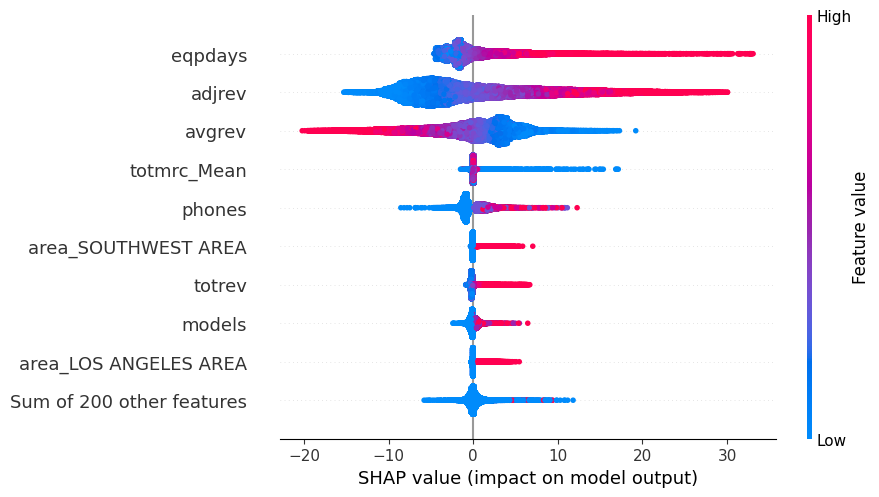

In [22]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))

In [23]:
df, X, y = input_train_file(train_file_name, my_dtype)

missing value all count:input_train_file 342969


In [24]:
def tract_data(df):
    '''
    INPUT
    df - pandas dataframe

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns
    5. For each numeric variable, fill the column with the mean value.
    6. Create dummy columns for all the categorical variables, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['months'], axis=0)
    y = df['months']

    #Drop respondent and expected salary columns
    df = df.drop(drop_features, axis=1)

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    X = df
    return X, y

In [25]:
X, y = tract_data(df)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [27]:
model = lgb.LGBMRegressor(random_state=123).fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2710
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 70
[LightGBM] [Info] Start training from score 18.832486


In [28]:
y_test_preds = model.predict(X_test) #We can then use our fitted model to predict the salary for each
                                        #indvidual in our test set, and see how well these predictions
                                        #match the truth.

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_test_preds)) #In this case we are predicting a continuous, numeric response.  Therefore, common
print(mean_squared_error(y_test, y_test_preds)) #metrics to assess fit include Rsquared and MSE.  

0.9503931279984539
4.668894308311371


In [30]:
importance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
display(importance)

,importance
avgrev,514
adjrev,414
eqpdays,405
phones,193
totrev,176
totmrc_Mean,167
avgmou,151
models,111
totmou,99
avg6rev,94


In [31]:
df_X = pd.DataFrame(X, columns=X.columns)
explainer = shap.Explainer(model.predict, X)

In [32]:
shap_values = explainer(df_X)

Permutation explainer: 100001it [1:03:37, 26.12it/s]                            


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


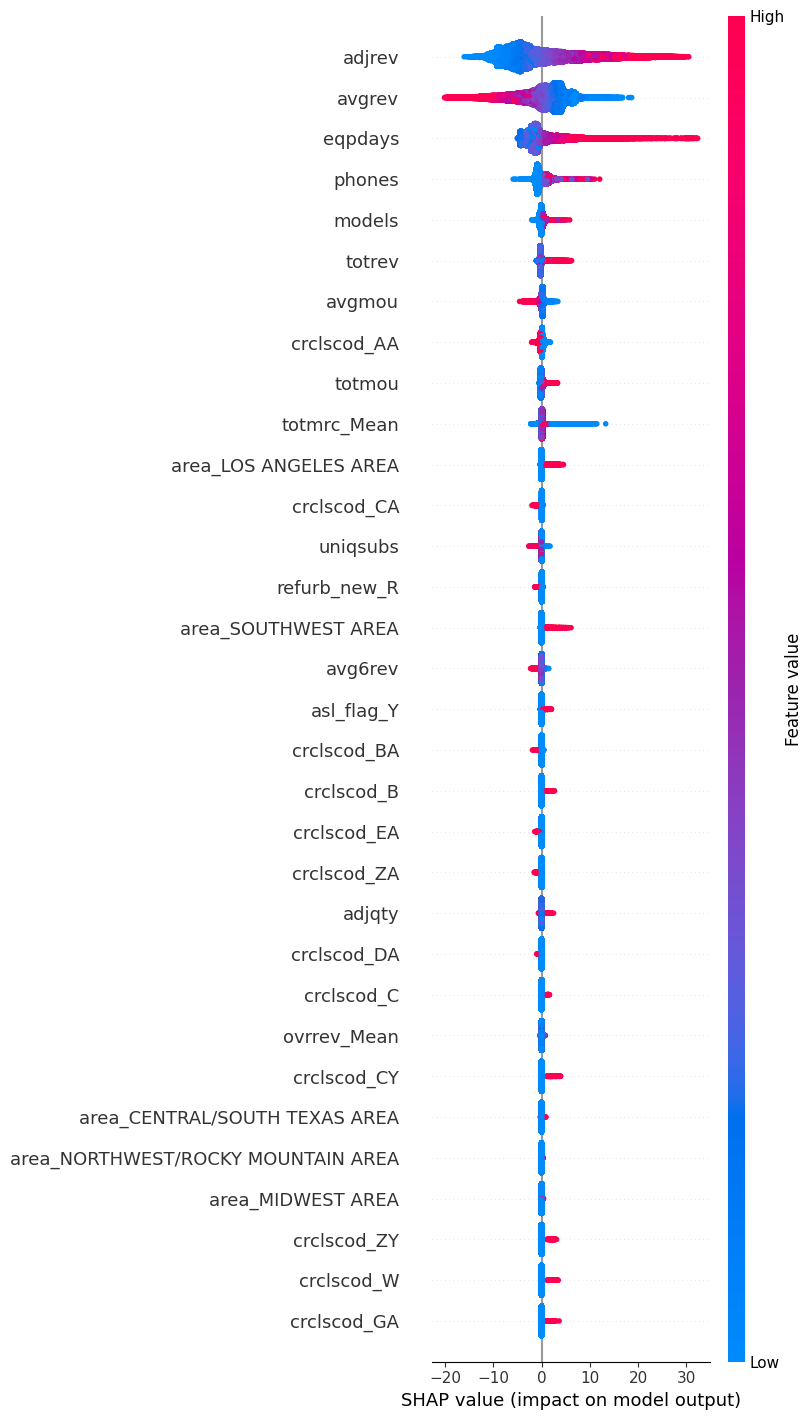

In [33]:
shap.summary_plot(
    shap_values = shap_values,
    features = X,
    max_display=32
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


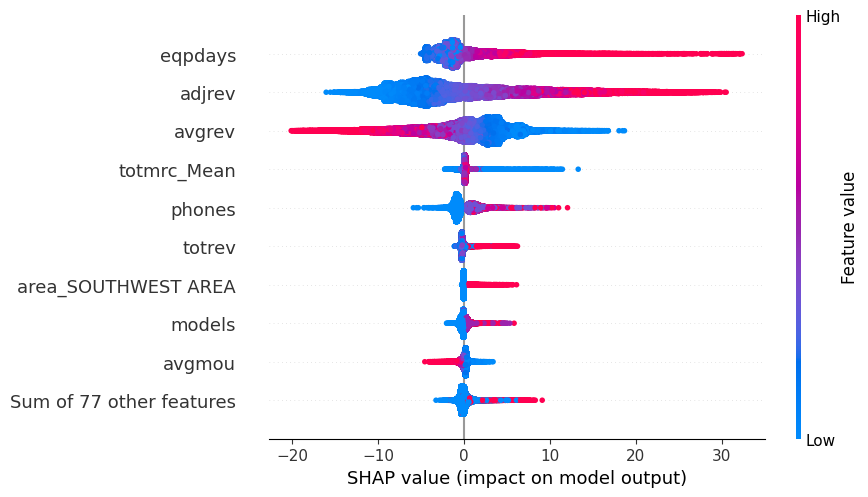

In [34]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.max(0))